# Q1 a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras 
keras.__version__



'2.4.3'

In [3]:
from keras.datasets import mnist
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

print('Shape of x train is' + str(train_X.shape))
print('Shape of y train is' + str(train_Y.shape))
print('Shape of x test is' + str(test_X.shape))
print('Shape of y test is' + str(test_Y.shape))
print('There are {} train samples'.format(train_X.shape[0]))
print('There are {} test samples'.format(train_Y.shape[0]))


Shape of x train is(60000, 28, 28)
Shape of y train is(60000,)
Shape of x test is(10000, 28, 28)
Shape of y test is(10000,)
There are 60000 train samples
There are 60000 test samples


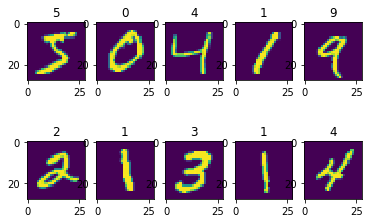

In [8]:
fig = plt.figure()
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.title(train_Y[:10][i])
    plt.imshow(train_X[i])

# b)

In [10]:
num_classes = 10
input_shape = (28, 28, 1)
train_Y = keras.utils.to_categorical(train_Y, num_classes)
test_Y = keras.utils.to_categorical(test_Y, num_classes)
train_Y[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

/Users/sylvia/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


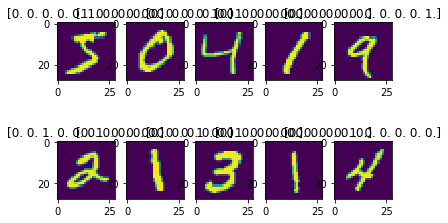

In [11]:
fig = plt.figure()
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.title(train_Y[:10][i])
    plt.imshow(train_X[i])

# c)

In [6]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Dense
from keras.layers import Flatten 
from keras.optimizers import SGD
def create_cnn():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
    Conv2D(32, (3, 3),
    activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(
    Dense (100 ,
    activation='relu', kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax')) # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile( optimizer=opt,
    loss='categorical_crossentropy', metrics=['accuracy'])
    return model
create_cnn().summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Scale images to shape (28, 28, 1)
train_X = train_X.astype("float32") / 255
test_X = test_X.astype("float32") / 255
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [8]:
model = create_cnn()
model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
score = model.evaluate(test_X, test_Y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1824 - accuracy: 0.9440 - val_loss: 0.0680 - val_accuracy: 0.9813
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0510 - val_accuracy: 0.9853
Epoch 3/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.0510 - val_accuracy: 0.9877
Epoch 4/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.0462 - val_accuracy: 0.9883
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0179 - accuracy: 0.9948 - val_loss: 0.0494 - val_accuracy: 0.9875
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.0496 - val_accuracy: 0.9872
Epoch 7/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0562 - val_accur

# e) 
i) The graph is shown. it is quite steady for both train and validation accuracy, and it is improving until reachs the maximum 1 for train accuracy, but not strictly keep improving for validation accuracy, it reached peak on 20 poaches and then droped a little bit after 30 poches.

ii) The graph is shown. it is steady improving until for train accuracy, but not strictly keep improving for validation accuracy, it reached peak on 40 poaches and then droped a little bit after that.

iii) Adding layers will lead Train accuracy = 0.9904444217681885 and Validation accuracy = 0.9916666746139526

iv) For learning rate = 0.001, Train accuracy = 0.9799814820289612 and Validation accuracy = 0.9896666407585144   
For learning rate = 0.1, Train accuracy = 0.10633333027362823 and Validation accuracy = 0.10450000315904617

In [9]:
#i
model = create_cnn()
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
train_accuracy = epoch_history.history['accuracy']
valiation_accuracy = epoch_history.history['val_accuracy']

Epoch 1/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1747 - accuracy: 0.9459 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 2/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0552 - val_accuracy: 0.9865
Epoch 3/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0587 - val_accuracy: 0.9835
Epoch 4/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0426 - val_accuracy: 0.9878
Epoch 5/50
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0484 - val_accuracy: 0.9870
Epoch 6/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0447 - val_accuracy: 0.9882
Epoch 7/50
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0696 - val_accur

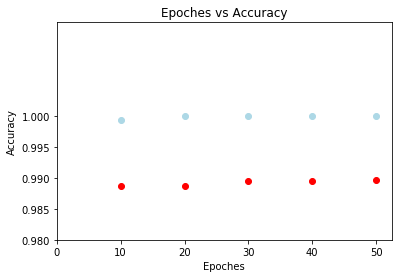

Train accuracy for every 10 epoches is shown in light blue, the train accuracy list for every 10 epoches is [0.9994259476661682, 1.0, 1.0, 1.0, 1.0]
Validation accuracy for every 10 epoches is shown in red, the validation accuracy list for every 10 epoches is [0.9886666536331177, 0.9886666536331177, 0.9894999861717224, 0.9894999861717224, 0.9896666407585144]


In [19]:
train_plot = []
vali_plot = []
for i in range(9,59,10):
    train_plot.append(train_accuracy[i])
    vali_plot.append(valiation_accuracy[i])
plt.scatter([10,20,30,40,50],train_plot, c='lightblue')
plt.scatter([10,20,30,40,50],vali_plot, c='red')
plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(0.98, 1, 0.005))
plt.ylabel('Accuracy')
plt.xlabel('Epoches')
plt.title('Epoches vs Accuracy')
plt.show()
print('Train accuracy for every 10 epoches is shown in light blue, the train accuracy list for every 10 epoches is {}'.format(train_plot))
print('Validation accuracy for every 10 epoches is shown in red, the validation accuracy list for every 10 epoches is {}'.format(vali_plot))

In [16]:
a = list(range(0,50))
for i in range(9,59,10):
    print(a[i])

9
19
29
39
49


In [12]:
#ii
def dropout_create_cnn():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
    Conv2D(32, (3, 3),
    activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(layers.Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
    Dense (100 ,
    activation='relu', kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax')) # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile( optimizer=opt,
    loss='categorical_crossentropy', metrics=['accuracy'])
    return model

dropout_create_cnn().summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [13]:
model = dropout_create_cnn()
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=50, validation_split=0.1)
# print validation and training accuracy over epochs
train_accuracy = epoch_history.history['accuracy']
validation_accuracy = epoch_history.history['val_accuracy']

Epoch 1/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.2098 - accuracy: 0.9348 - val_loss: 0.0657 - val_accuracy: 0.9827
Epoch 2/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0921 - accuracy: 0.9713 - val_loss: 0.0500 - val_accuracy: 0.9878
Epoch 3/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.0464 - val_accuracy: 0.9877
Epoch 4/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0431 - val_accuracy: 0.9888
Epoch 5/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0423 - val_accuracy: 0.9885
Epoch 6/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0400 - accuracy: 0.9869 - val_loss: 0.0423 - val_accuracy: 0.9883
Epoch 7/50
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0348 - accuracy: 0.9884 - val_loss: 0.0407 - val_ac

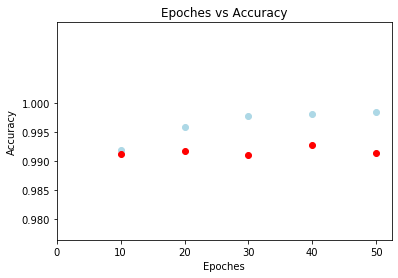

Train accuracy for every 10 epoches is shown in light blue, the train accuracy list for every 10 epoches is [0.9919815063476562, 0.9958333373069763, 0.9977222084999084, 0.9980740547180176, 0.998370349407196]
Validation accuracy for every 10 epoches is shown in red, the validation accuracy list for every 10 epoches is [0.9911666512489319, 0.9918333292007446, 0.9909999966621399, 0.9928333163261414, 0.9913333058357239]


In [14]:
train_plot = []
vali_plot = []
for i in range(9,59,10):
    train_plot.append(train_accuracy[i])
    vali_plot.append(validation_accuracy[i])
plt.scatter([10,20,30,40,50],train_plot, c='lightblue')
plt.scatter([10,20,30,40,50],vali_plot, c='red')
plt.xticks(np.arange(0, 60, 10))
plt.yticks(np.arange(0.98, 1, 0.005))
plt.ylabel('Accuracy')
plt.xlabel('Epoches')
plt.title('Epoches vs Accuracy')
plt.show()
print('Train accuracy for every 10 epoches is shown in light blue, the train accuracy list for every 10 epoches is {}'.format(train_plot))
print('Validation accuracy for every 10 epoches is shown in red, the validation accuracy list for every 10 epoches is {}'.format(vali_plot))

In [15]:
#iii
def additional_create_cnn():
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
    Conv2D(32, (3, 3),
    activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # add addtional layer
    model.add(
    Conv2D(64, (3, 3),
    activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
    )
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(layers.Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
    Dense (100 ,
    activation='relu', kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax')) # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile( optimizer=opt,
    loss='categorical_crossentropy', metrics=['accuracy'])
    return model
additional_create_cnn().summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [16]:
model = additional_create_cnn()
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
# print validation and training accuracy over epochs
print('Train accuracy = ' + str(epoch_history.history['accuracy'][9]))
print('Validation accuracy = ' + str(epoch_history.history['val_accuracy'][9]))

Epoch 1/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.1955 - accuracy: 0.9388 - val_loss: 0.0514 - val_accuracy: 0.9847
Epoch 2/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0821 - accuracy: 0.9739 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 3/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 4/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0411 - val_accuracy: 0.9888
Epoch 5/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0445 - accuracy: 0.9853 - val_loss: 0.0316 - val_accuracy: 0.9917
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0327 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0369 - accuracy: 0.9879 - val_loss: 0.0317 -

In [19]:
#iv
def Lr_create_cnn(lr):
    # define using Sequential
    model = Sequential ()
    # Convolution layer
    model.add(
    Conv2D(32, (3, 3),
    activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2, 2)))
    # add addtional layer
    model.add(
    Conv2D(64, (3, 3),
    activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
    )
    model.add(MaxPooling2D((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(layers.Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
    Dense (100 ,
    activation='relu', kernel_initializer='he_uniform') )
    model.add(Dense(10, activation='softmax')) # initialize optimizer
    opt = SGD(lr=lr, momentum=0.9)
    # compile model
    model.compile( optimizer=opt,
    loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
#0.001
model = Lr_create_cnn(0.001)
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
# print validation and training accuracy over epochs
print('Train accuracy = ' + str(epoch_history.history['accuracy'][9]))
print('Validation accuracy = ' + str(epoch_history.history['val_accuracy'][9]))

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.4168 - accuracy: 0.8677 - val_loss: 0.1057 - val_accuracy: 0.9707
Epoch 2/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.1588 - accuracy: 0.9510 - val_loss: 0.0760 - val_accuracy: 0.9803
Epoch 3/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1221 - accuracy: 0.9624 - val_loss: 0.0616 - val_accuracy: 0.9835
Epoch 4/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1066 - accuracy: 0.9669 - val_loss: 0.0555 - val_accuracy: 0.9843
Epoch 5/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0933 - accuracy: 0.9707 - val_loss: 0.0502 - val_accuracy: 0.9860
Epoch 6/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0842 - accuracy: 0.9737 - val_loss: 0.0453 - val_accuracy: 0.9875
Epoch 7/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.0434 -

In [21]:
#0.1
model = Lr_create_cnn(0.1)
epoch_history = model.fit(train_X, train_Y, batch_size=32, epochs=10, validation_split=0.1)
# print validation and training accuracy over epochs
print('Train accuracy = ' + str(epoch_history.history['accuracy'][9]))
print('Validation accuracy = ' + str(epoch_history.history['val_accuracy'][9]))

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.0001 - accuracy: 0.7229 - val_loss: 1.1904 - val_accuracy: 0.6107
Epoch 2/10
1688/1688 [==============================] - 23s 13ms/step - loss: 1.3030 - accuracy: 0.6174 - val_loss: 0.9628 - val_accuracy: 0.7025
Epoch 3/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.3835 - accuracy: 0.5428 - val_loss: 1.0486 - val_accuracy: 0.6468
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.3324 - accuracy: 0.5458 - val_loss: 1.0627 - val_accuracy: 0.6323
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 1.4739 - accuracy: 0.4979 - val_loss: 2.3119 - val_accuracy: 0.0978
Epoch 6/10
1688/1688 [==============================] - 22s 13ms/step - loss: 2.3091 - accuracy: 0.1042 - val_loss: 2.3107 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 23s 14ms/step - loss: 2.3079 - accuracy: 0.1073 - val_loss: 2.3113 -

# f)
i) It is steady for train and validation accuracy without dropout, and it keep improving until reaching the maximum train accuracy of 1. However, it is not strictly improving for validation accuracy, it reached peak on 20 poaches and then droped a little bit after 30 poches.

After using dropout, it is steady improving until for train accuracy, but not strictly keep improving for validation accuracy, it reached peak on 40 poaches and then droped a little bit after that. The accuracy of trainning set no longer reaches 1 since we aviod overfitting, respectively our validation accuracy is higer than before since the model is more generative compare to the overfitting model. 

ii) For 10 epoches, original model with dropout has Train accuracy = 0.9904444217681885 and Validation accuracy = 0.9916666746139526; addtional layer model with dropout has Train accuracy = 0.9919815063476562 and Validation accuracy = 0.9911666512489319, they have no obvious differences regarding their performance. 

iii) For 10 epoches and addtional layer model with dropout, when lr = 0.01, it has Train accuracy = 0.9919815063476562 and Validation accuracy = 0.9911666512489319;  
when lr = 0.001, Train accuracy = 0.9799814820289612 and Validation accuracy = 0.9896666407585144;   
when learning rate = 0.1, Train accuracy = 0.10633333027362823 and Validation accuracy = 0.10450000315904617
It show the lr = 0.01 performs best among all three, since too large and too small lr will be not efficient and result inaccurate result. 

# Q2 a) 
Mona Lisa is shown below

In [164]:
import numpy as np
import matplotlib.pyplot as plt
import random
from skimage import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing import image 
from sklearn import preprocessing

(900, 604, 3)

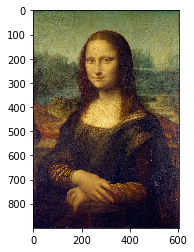

In [114]:
monalisa = plt.imread('/Users/sylvia/Desktop/AML/HW3/HW3_Monalisa.jpg')
plt.imshow(monalisa)
monalisa.shape

# b) Preprocessing the input.
No need to do other preprocessing steps since it is an image and dose not have any statistical data that need to be preprocessed with mean subtraction, standardization, or unit-normalization.

In [115]:
monalisa = np.array(monalisa)
x = np.random.randint(monalisa.shape[0],size = 5000)
y = np.random.randint(monalisa.shape[1],size = 5000)
inputs = np.transpose(np.array([x,y]))
inputs.shape
print(inputs)

[[880 577]
 [ 62 457]
 [667  20]
 ...
 [664 299]
 [626 405]
 [450 342]]


# (c) Preprocessing the output.
No other preprocessing is necessary beside convert image to grayscale and make pixel betweent 0 to 1.

In [118]:
gray = io.imread('/Users/sylvia/Desktop/AML/HW3/HW3_Monalisa.jpg', as_gray=True)
outputs = gray[x,y]
np.transpose(outputs).reshape((1,5000))

array([[0.02601294, 0.51981412, 0.20807961, ..., 0.0804098 , 0.13309451,
        0.68716667]])

# (d) Build the final image
imported RandomForestRegressor from sklearn.ensemble


/Users/sylvia/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


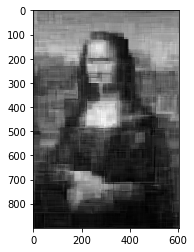

In [119]:
reg = RandomForestRegressor(random_state = 0)
model = reg.fit(inputs,outputs)
test_x = []
for i in range(monalisa.shape[0]):
    for j in range(monalisa.shape[1]):
        test_x.append([i,j])
prediction = model.predict(test_x)
plt.imshow(np.transpose(prediction).reshape(monalisa.shape[0],monalisa.shape[1]),cmap = 'gray')

# e) Experimentation.

i) Larger depth gives more accurate image, smaller depth gives very unaccurate image, that is because the deeper the tree, the more splits it has and it captures more information about the data. 

ii) Generally when the tree is not too many, more trees gives more clear image, smaller depth gives very unclear image, that is because more tree can adding specialization and fit the data better. However when the tree number is too much, the model will be overfited. 

iii) Knn shows a different type of classifier that the neiborhood is in circular shape, since it is messured by L1 distance. it's different from the random forest which has rectangle shape neighbor. 

iv) Use Random Forest Regressor with depth = 1000, trees = 10, since from i) and ii) we noticed depth and relevantly large tree number gives more accurate image (but  number of trees can not be too large, since we want to avoid over fitting) The result was quite good but not significant different from inital pridection of Random Forest Regressor in Q d)

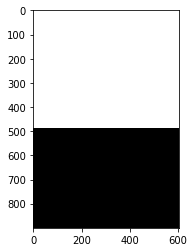

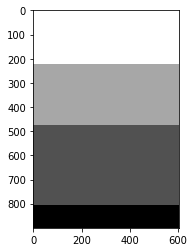

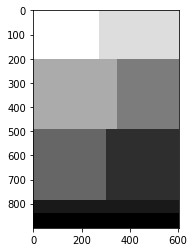

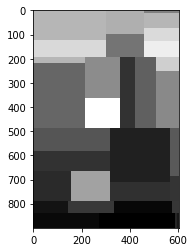

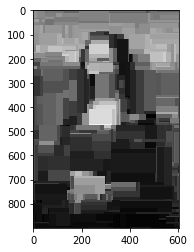

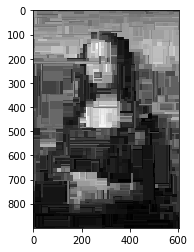

In [120]:
#i single decision tree
depths = [1,2,3,5,10,15]
for i in depths:
    reg = RandomForestRegressor(max_depth = i,n_estimators = 1)
    model = reg.fit(inputs,outputs)
    test_x = []
    for i in range(monalisa.shape[0]):
        for j in range(monalisa.shape[1]):
            test_x.append([i,j])
    prediction = model.predict(test_x)
    plt.imshow(np.transpose(prediction).reshape(monalisa.shape[0],monalisa.shape[1]),cmap = 'gray')
    plt.show()

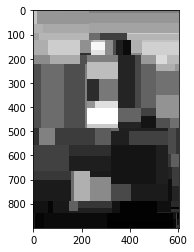

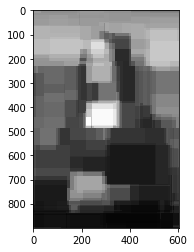

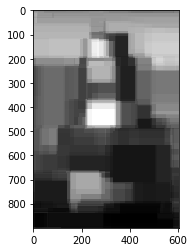

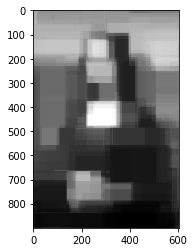

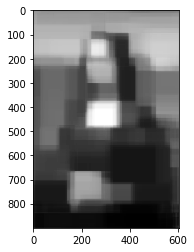

In [121]:
#ii depth = 7, decision tree list
tree_nums = [1,3,5,10,100]
for i in tree_nums:
    reg = RandomForestRegressor(max_depth = 7,n_estimators = i)
    model = reg.fit(inputs,outputs)
    test_x = []
    for i in range(monalisa.shape[0]):
        for j in range(monalisa.shape[1]):
            test_x.append([i,j])
    prediction = model.predict(test_x)
    plt.imshow(np.transpose(prediction).reshape(monalisa.shape[0],monalisa.shape[1]),cmap = 'gray')
    plt.show()


In [123]:
print(inputs.shape)
print(outputs.shape)

(5000, 2)
(5000,)


In [157]:
outputs

array([0.02601294, 0.51981412, 0.20807961, ..., 0.0804098 , 0.13309451,
       0.68716667])

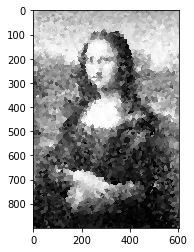

In [163]:
#iii KNN
lab_enc = preprocessing.LabelEncoder()
outputs = lab_enc.fit_transform(outputs)
knn = KNeighborsClassifier(n_neighbors = 1)
model = knn.fit(inputs,outputs)
test_x = []
for i in range(monalisa.shape[0]):
    for j in range(monalisa.shape[1]):
        test_x.append([i,j])
prediction = model.predict(test_x)
plt.imshow(np.transpose(prediction).reshape(monalisa.shape[0],monalisa.shape[1]),cmap = 'gray')


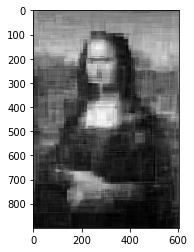

In [133]:
# iv
# Use Random Forest Regressor with depth = 500, trees = 10
reg = RandomForestRegressor(max_depth = 500,n_estimators = 10)
model = reg.fit(inputs,outputs)
test_x = []
for i in range(monalisa.shape[0]):
    for j in range(monalisa.shape[1]):
        test_x.append([i,j])
prediction = model.predict(test_x)
plt.imshow(np.transpose(prediction).reshape(monalisa.shape[0],monalisa.shape[1]),cmap = 'gray')
plt.show()

# f) Anlysis

i) A decision tree makes decisions by splitting nodes into sub-nodes. This process is performed multiple times during the training process until only only one nodes is left. Split node formula could be "if x < c, split" where c = int (threshold)

ii)Random forest looks rectangular, since they are evenly distributed in the coordinator with x and y (vertical and horizontal) boundary. 
Knn shows a different type of classifier that the neiborhood is in circular shape, since it is messured by L1 distance. it's different from the random forest which has rectangle shape neighbor.

iii) 2^(numbers of depths)

iv) (number of tree) * 2^(numbers of depths)